#**1. PROJECT INTRODUCTION**

##• Judul project

**End-to-End Credit Card Fraud Detection
Using Machine Learning : Model Comparison, Threshold Optimization, and Business Impact Analysis**

##• Hasil Utama

Model terbaik pada proyek ini adalah **XGBoost Tuned** dengan performa:

- **PR-AUC: 0.874**
- **Fraud Detection Rate: 78.6%**
- False Positive Rate tetap sangat rendah

Hasil ini menunjukkan bahwa model mampu mendeteksi sebagian besar transaksi fraud pada dataset yang sangat imbalanced tanpa menghasilkan terlalu banyak false alarm.

##• Deskripsi Proyek

Author : Neo Saffana Farhalik

Role : Data Analyst

Date : February 2026

Environment : Python, Google Colab

Github : https://github.com/neosaffana


Fraud pada transaksi kartu kredit merupakan salah satu masalah serius dalam industri keuangan.
Deteksi fraud menjadi menantang karena jumlah transaksi fraud sangat kecil dibandingkan dengan transaksi normal (imbalanced dataset).


Proyek ini bertujuan untuk membangun sistem **deteksi fraud pada transaksi kartu kredit menggunakan machine learning**.
Beberapa algoritma machine learning dibandingkan untuk menemukan model dengan performa terbaik dalam mendeteksi transaksi fraud.


Selain membandingkan performa model, proyek ini juga melakukan **threshold optimization** dan **business impact analysis** untuk memastikan bahwa model yang dipilih tidak hanya akurat secara teknis, tetapi juga memberikan nilai bisnis yang optimal dalam meminimalkan potensi kerugian akibat fraud.

Hasil dari proyek ini diharapkan dapat membantu institusi keuangan dalam
mendeteksi transaksi fraud lebih dini sehingga dapat mengurangi potensi
kerugian finansial secara signifikan.

##• Tujuan Proyek

Tujuan utama dari proyek ini adalah :
- Membangun model machine learning untuk mendeteksi transaksi kartu kredit yang berpotensi fraud
- Membandingkan performa beberapa algoritma machine learning
- Mengevaluasi model menggunakan metrik yang sesuai untuk dataset imbalanced seperti **ROC-AUC dan PR-AUC**
- Mengoptimalkan **classification threshold** untuk meningkatkan kemampuan model dalam mendeteksi fraud
- Menganalisis **dampak bisnis (business impact)** dari model yang dihasilkan

##• Dataset

Dataset yang digunakan dalam proyek ini adalah **Credit Card Fraud Detection Dataset**
yang dipublikasikan oleh Machine Learning Group ULB dan tersedia di platform Kaggle.

Dataset ini berisi transaksi kartu kredit yang dilakukan oleh pemegang kartu di Eropa
pada bulan September 2013.

###Karakteristik Dataset

- Total transaksi : **284,807**
- Jumlah transaksi fraud : **492**
- Proporsi fraud : **0.172%**
- Dataset sangat **imbalanced**

Hal ini membuat fraud detection menjadi tantangan karena model harus mampu
mendeteksi kasus fraud yang sangat sedikit dibandingkan transaksi normal.

###Fitur Dataset

Dataset ini berisi **31 fitur**, yaitu :

- **Time** → waktu sejak transaksi pertama
- **Amount** → jumlah transaksi
- **V1 – V28** → fitur hasil transformasi PCA untuk menjaga kerahasiaan data asli
- **Class** → target variable
  - 0 = transaksi normal
  - 1 = transaksi fraud

Karena data sangat tidak seimbang, evaluasi model dalam proyek ini lebih
difokuskan pada metrik seperti **Precision, Recall, F1 Score, ROC-AUC, dan PR-AUC**.

Dataset Source :
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

##• Model yang Digunakan

Beberapa algoritma machine learning digunakan dan dibandingkan dalam proyek ini :
* Logistic Regression
* Random Forest
* Gradient Boosting
* XGBoost
* LightGBM

Setiap model dilatih menggunakan data training dan dievaluasi menggunakan data testing untuk melihat performa dalam mendeteksi transaksi fraud.

##• Metode Evaluasi

Karena dataset memiliki karakteristik **imbalanced class**, evaluasi model tidak hanya menggunakan accuracy.

Metrik yang digunakan dalam proyek ini meliputi :

- **Precision**  
  Mengukur seberapa banyak prediksi fraud yang benar-benar fraud.

- **Recall**  
  Mengukur seberapa banyak fraud yang berhasil dideteksi oleh model.

- **F1 Score**  
  Kombinasi antara precision dan recall.

- **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**  
  Mengukur kemampuan model dalam membedakan kelas fraud dan non-fraud.

- **PR-AUC (Precision-Recall Area Under Curve)**  
  Metrik yang sangat penting untuk dataset imbalanced karena fokus pada performa deteksi fraud.

##• Project Pipeline

Tahapan dalam proyek ini meliputi :
1. Import Library
2. Load Dataset
3. Data Understanding
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing
6. Model Training
7. Model Comparison
8. Threshold Optimization
9. Business Impact Analysis
10. Final Model and Business Recommendation

#**2. IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    confusion_matrix
)

#**3. LOAD DATASET**

In [ ]:
df = pd.read_csv("creditcard.csv")

print(df.shape)

df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#**4. DATA UNDERSTANDING**

> Tujuannya memahami struktur dataset.



##• Dataset Overview

In [79]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##• Cek Distribusi Fraud

> Melihat jumlah fraud vs non fraud.



In [ ]:
df["Class"].value_counts()

,count
Class,
0,284315
1,492


##• Cek Rasio Fraud

> Menghitung persentase fraud.



In [ ]:
df["Class"].value_counts(normalize=True)

,proportion
Class,
0,0.998273
1,0.001727


##• Cek Missing Value

In [94]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


#**5. EXPLORATORY DATA ANALYSIS (EDA)**

##5.1 Distribusi Transaksi Fraud vs Non-Fraud

> Tujuan : Melihat distribusi jumlah transaksi fraud dan non-fraud untuk memahami tingkat ketidakseimbangan dataset.



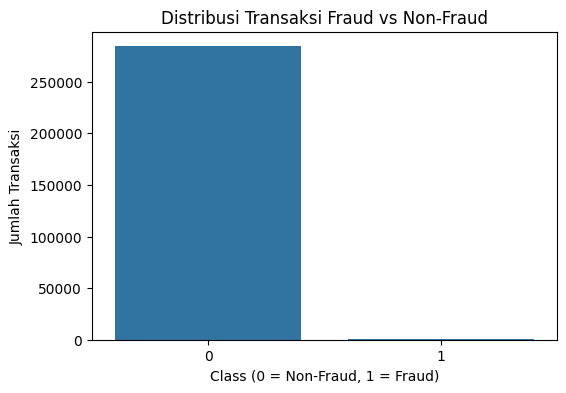

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)

plt.title("Distribusi Transaksi Fraud vs Non-Fraud")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Jumlah Transaksi")

plt.show()

**Insight :**
- Grafik menunjukkan distribusi transaksi yang sangat tidak seimbang antara kelas non-fraud dan fraud. Dari total 284.807 transaksi, hanya 492 transaksi (≈0.17%) yang merupakan fraud, sedangkan sebagian besar transaksi (≈99.83%) adalah non-fraud.
- Ketidakseimbangan ini menunjukkan bahwa dataset termasuk dalam kategori **highly imbalanced dataset**, yang merupakan karakteristik umum dalam kasus fraud detection. Jika model hanya mengandalkan metrik accuracy, model dapat terlihat memiliki performa tinggi karena mayoritas transaksi adalah non-fraud, meskipun sebenarnya gagal mendeteksi transaksi fraud.
- Oleh karena itu, evaluasi model dalam proyek ini tidak hanya menggunakan accuracy, tetapi juga metrik yang lebih relevan untuk dataset tidak seimbang seperti **Precision-Recall AUC, Recall, dan F1 Score** untuk memastikan model mampu mendeteksi transaksi fraud secara efektif.

##5.2 Distribusi Feature Amount

> Tujuan : Melihat distribusi nilai transaksi (Amount) untuk memahami pola nilai transaksi dalam dataset.



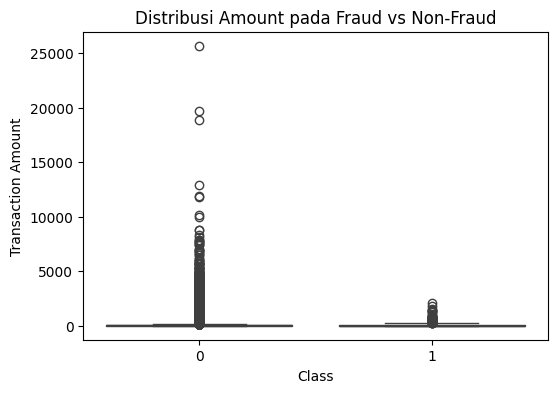

In [81]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Class", y="Amount", data=df)

plt.title("Distribusi Amount pada Fraud vs Non-Fraud")
plt.xlabel("Class")
plt.ylabel("Transaction Amount")

plt.show()

**Insight :**
- Grafik menunjukkan distribusi jumlah transaksi (Amount) pada transaksi fraud dan non-fraud. Terlihat bahwa sebagian besar transaksi memiliki nilai yang relatif kecil, sementara terdapat beberapa transaksi dengan nilai sangat besar (outliers), terutama pada kelas non-fraud.
- Transaksi non-fraud memiliki variasi nilai yang jauh lebih besar dibandingkan transaksi fraud, dengan beberapa transaksi mencapai nilai yang sangat tinggi. Sebaliknya, transaksi fraud cenderung terjadi pada nilai transaksi yang lebih kecil hingga menengah.
- Hal ini menunjukkan bahwa nilai transaksi saja tidak cukup untuk secara langsung membedakan fraud dan non-fraud, karena kedua kelas masih memiliki rentang nilai yang saling tumpang tindih. Oleh karena itu, model machine learning perlu memanfaatkan kombinasi berbagai fitur lain untuk dapat mendeteksi pola fraud secara lebih efektif.

##5.3 Korelasi Antar Feature

> Tujuan : Mengidentifikasi hubungan antar fitur menggunakan matriks korelasi untuk melihat fitur yang paling berkaitan dengan fraud.



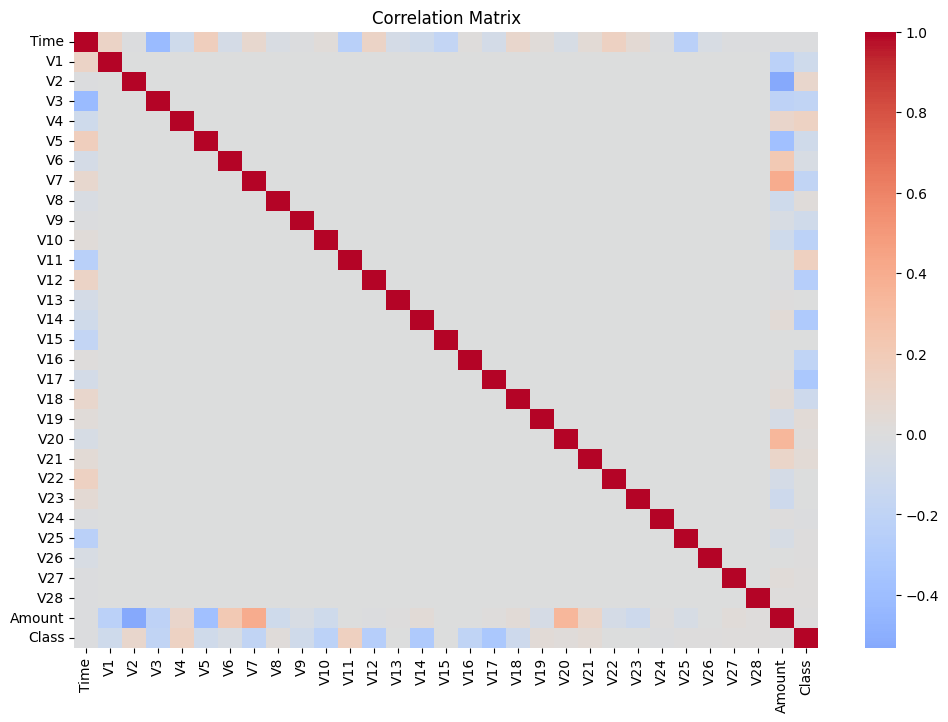

In [84]:
plt.figure(figsize=(12,8))

corr = df.corr()

sns.heatmap(corr, cmap="coolwarm", center=0)

plt.title("Correlation Matrix")

plt.show()

In [85]:
corr_target = df.corr()["Class"].sort_values(ascending=False)

print(corr_target)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


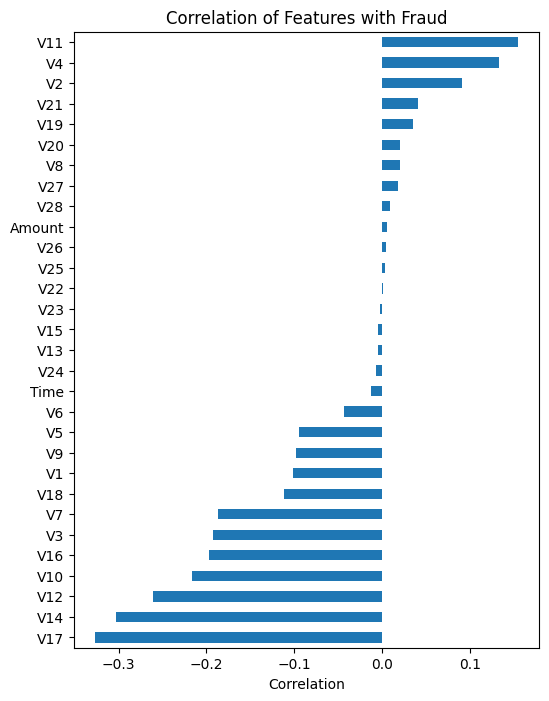

In [86]:
plt.figure(figsize=(6,8))

corr_target.drop("Class").sort_values().plot(kind="barh")

plt.title("Correlation of Features with Fraud")
plt.xlabel("Correlation")

plt.show()

**Insight :**
- Hasil analisis korelasi menunjukkan bahwa beberapa fitur memiliki hubungan yang relatif lebih kuat terhadap variabel target (Class). Feature seperti **V11, V4, V2, dan V21** memiliki korelasi positif yang paling tinggi terhadap transaksi fraud, yang menunjukkan bahwa nilai fitur tersebut cenderung meningkat pada transaksi yang terindikasi fraud.
- Sebaliknya, beberapa fitur seperti **V17, V14, V12, dan V10** memiliki korelasi negatif yang cukup kuat terhadap fraud, yang berarti nilai fitur tersebut cenderung menurun pada transaksi fraud dibandingkan transaksi normal.
- Namun secara umum, sebagian besar fitur memiliki nilai korelasi yang relatif kecil terhadap target. Hal ini menunjukkan bahwa pola fraud tidak dapat dijelaskan oleh satu fitur saja, melainkan merupakan kombinasi kompleks dari berbagai fitur. Oleh karena itu, penggunaan model machine learning diperlukan untuk menangkap pola non-linear dan interaksi antar fitur dalam mendeteksi transaksi fraud.

**Catatan Penting tentang Feature Dataset**

Pada dataset ini, sebagian besar fitur diberi nama **V1 hingga V28** karena data asli telah melalui proses **Principal Component Analysis (PCA)** untuk menjaga kerahasiaan informasi pengguna kartu kredit. Proses ini mentransformasikan fitur asli menjadi komponen numerik baru sehingga identitas dan informasi sensitif tetap terlindungi.

Akibat dari transformasi PCA tersebut, interpretasi langsung terhadap masing-masing fitur menjadi lebih terbatas karena fitur tidak lagi merepresentasikan variabel asli. Namun, fitur-fitur ini tetap dapat digunakan secara efektif oleh model machine learning untuk menemukan pola transaksi yang mencurigakan.

Selain itu, sebagian besar fitur menunjukkan nilai korelasi yang relatif kecil terhadap target. Hal ini umum terjadi pada dataset fraud detection karena pola fraud biasanya tidak bergantung pada satu variabel saja, melainkan kombinasi kompleks dari berbagai fitur.

Oleh karena itu, pendekatan machine learning yang mampu menangkap hubungan non-linear dan interaksi antar fitur, seperti ensemble models (Random Forest, Gradient Boosting, XGBoost, dan LightGBM), menjadi sangat penting untuk meningkatkan kemampuan deteksi fraud.

##5.4 Distribusi Time Feature

> Tujuan :

> Melihat distribusi waktu transaksi untuk memahami pola aktivitas transaksi dalam dataset.
Feature **Time** merepresentasikan jumlah detik yang berlalu sejak transaksi pertama pada dataset.

> Analisis ini bertujuan untuk mengetahui apakah terdapat pola tertentu pada waktu transaksi,
misalnya apakah transaksi fraud lebih sering terjadi pada waktu tertentu dibandingkan transaksi normal.



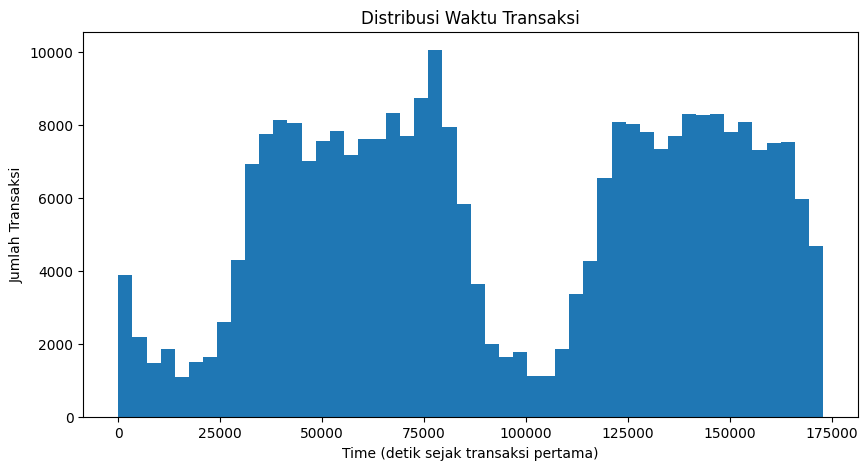

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(df["Time"], bins=50)

plt.title("Distribusi Waktu Transaksi")
plt.xlabel("Time (detik sejak transaksi pertama)")
plt.ylabel("Jumlah Transaksi")

plt.show()

**Insight :**
- Distribusi waktu transaksi menunjukkan bahwa aktivitas transaksi terjadi secara kontinu sepanjang periode observasi. Terlihat dua area kepadatan transaksi yang cukup tinggi, yang kemungkinan merepresentasikan dua hari periode transaksi dalam dataset.
- Hal ini menunjukkan bahwa volume transaksi tidak sepenuhnya merata sepanjang waktu, melainkan memiliki periode aktivitas yang lebih tinggi. Karena fitur **Time** hanya merepresentasikan waktu relatif sejak transaksi pertama, fitur ini tidak memberikan informasi langsung mengenai jam atau tanggal transaksi.
- Meskipun demikian, feature **Time** tetap dapat membantu model machine learning dalam menangkap pola temporal tertentu yang mungkin berkaitan dengan aktivitas fraud.

##5.5 Top Features yang Berkorelasi dengan Fraud

Menghitung korelasi semua fitur terhadap target

In [88]:
corr_target = df.corr()["Class"].drop("Class")

Ambil 10 fitur dengan korelasi tertinggi (positif dan negatif)

In [89]:
top_features = corr_target.abs().sort_values(ascending=False).head(10)

print(top_features)

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
V18    0.111485
Name: Class, dtype: float64


Visualisasi Top Feature

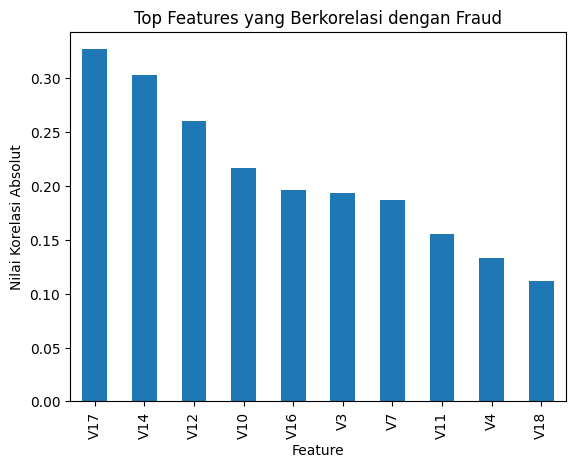

In [90]:
import matplotlib.pyplot as plt

top_features.plot(kind="bar")

plt.title("Top Features yang Berkorelasi dengan Fraud")
plt.ylabel("Nilai Korelasi Absolut")
plt.xlabel("Feature")
plt.show()

**Insight :**
- Berdasarkan analisis korelasi terhadap variabel target **Class**, beberapa fitur menunjukkan hubungan yang lebih kuat dengan transaksi fraud dibandingkan fitur lainnya.
- Feature seperti **V17, V14, V12, V10, dan V16** memiliki nilai korelasi tertinggi terhadap fraud. Hal ini menunjukkan bahwa pola yang terkandung dalam fitur-fitur tersebut lebih sering muncul pada transaksi fraud dibandingkan transaksi normal.
- Perlu diperhatikan bahwa sebagian besar fitur dalam dataset ini merupakan hasil transformasi **Principal Component Analysis (PCA)**, sehingga interpretasi langsung terhadap arti fitur tidak dapat diketahui secara spesifik. Namun demikian, nilai korelasi ini tetap memberikan indikasi bahwa fitur-fitur tersebut berperan penting dalam membantu model machine learning membedakan transaksi fraud dan non-fraud.
- Informasi ini juga menunjukkan bahwa model machine learning dapat memanfaatkan kombinasi beberapa fitur utama untuk mengidentifikasi pola transaksi yang mencurigakan secara lebih efektif.

##5.6 Fraud vs Non-Fraud Feature Distribution

> Tujuan :

> Pada tahap ini dilakukan analisis distribusi beberapa fitur yang memiliki korelasi tertinggi terhadap fraud.
Tujuannya adalah untuk melihat apakah terdapat perbedaan pola distribusi antara transaksi fraud dan non-fraud.

> Jika distribusi kedua kelas terlihat berbeda, maka fitur tersebut berpotensi membantu model machine learning dalam membedakan transaksi yang normal dan transaksi yang mencurigakan.


Ambil 3 feature teratas

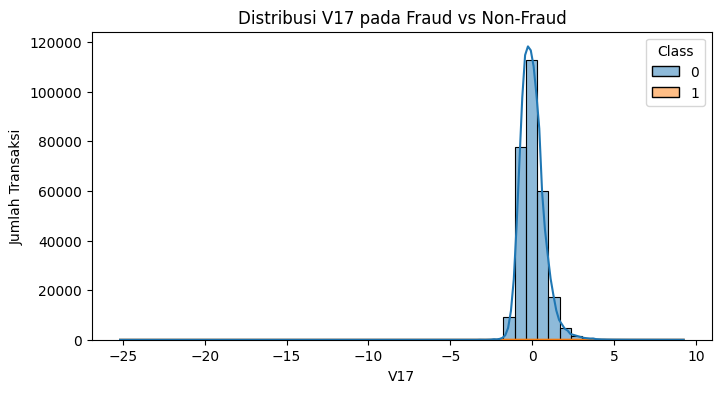

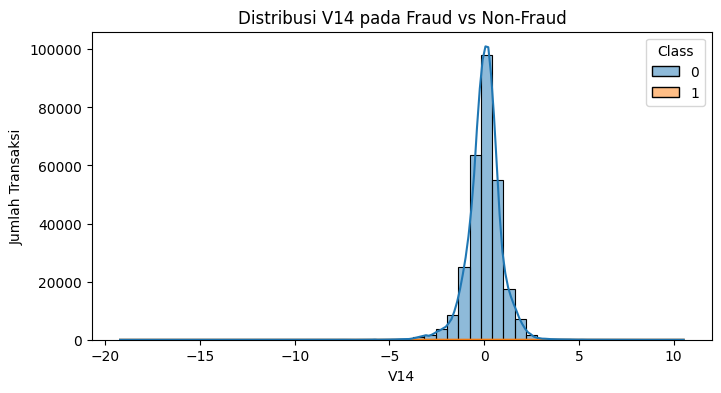

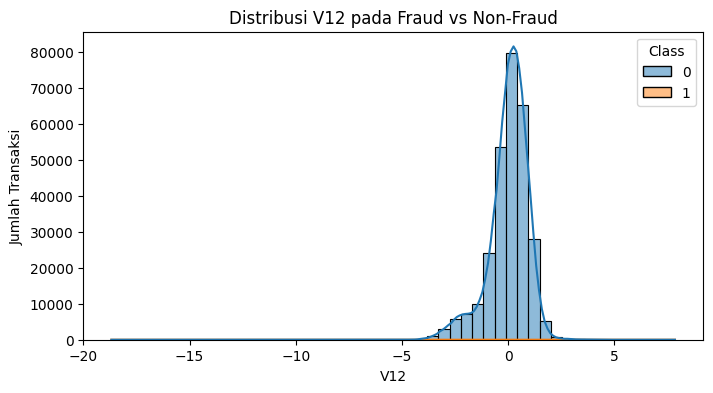

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ["V17","V14","V12"]

for feature in features_to_plot:

    plt.figure(figsize=(8,4))

    sns.histplot(
        data=df,
        x=feature,
        hue="Class",
        bins=50,
        kde=True
    )

    plt.title(f"Distribusi {feature} pada Fraud vs Non-Fraud")
    plt.xlabel(feature)
    plt.ylabel("Jumlah Transaksi")

    plt.show()

**Insight :**

- Distribusi fitur **V17, V14, dan V12** menunjukkan bahwa transaksi fraud memiliki pola nilai yang berbeda dibandingkan transaksi normal. Transaksi non-fraud umumnya terpusat di sekitar nilai tengah, sementara transaksi fraud lebih sering muncul pada nilai yang lebih ekstrem.
- Perbedaan distribusi ini mengindikasikan bahwa fitur-fitur tersebut mampu menangkap pola anomali pada transaksi kartu kredit. Hal ini sejalan dengan analisis korelasi sebelumnya yang menunjukkan bahwa **V17, V14, dan V12 termasuk fitur yang paling berpengaruh terhadap label fraud**.
- Oleh karena itu, fitur-fitur ini kemungkinan besar berkontribusi signifikan dalam membantu model machine learning membedakan transaksi fraud dan non-fraud.

#**6. DATA PREPROCESSING**

##6.1 Split Feature dan Target

In [ ]:
X = df.drop("Class", axis=1)

y = df["Class"]

##6.2 Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Kenapa pakai stratify?

Supaya rasio fraud tetap sama di train dan test.

##6.3 Feature Scaling

Karena hanya Time dan Amount yang perlu scaling.

In [ ]:
scaler = RobustScaler()

X_train["Amount"] = scaler.fit_transform(X_train[["Amount"]])
X_test["Amount"] = scaler.transform(X_test[["Amount"]])

X_train["Time"] = scaler.fit_transform(X_train[["Time"]])
X_test["Time"] = scaler.transform(X_test[["Time"]])

#**7. MODEL TRAINING**

##**7.1 Model 1 — Logistic Regression**

In [ ]:
model_lr = LogisticRegression(
    class_weight="balanced",
    max_iter=2000
)

model_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

###7.1.2 Prediksi Model

In [ ]:
y_pred_lr = model_lr.predict(X_test)

y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

###7.1.3 Evaluasi Model

In [ ]:
print(classification_report(y_test, y_pred_lr))

print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

print("PR-AUC:", average_precision_score(y_test, y_prob_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC: 0.9720453671057618
PR-AUC: 0.7174539341990154


##**7.2 Model 2 — Random Forest**

###7.2.1 Import Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

###7.2.2 Train Model

In [ ]:
model_rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

###7.2.3 Prediksi Model

In [ ]:
y_pred_rf = model_rf.predict(X_test)

y_prob_rf = model_rf.predict_proba(X_test)[:,1]

###7.2.4 Evaluasi Model

In [ ]:
print(classification_report(y_test, y_pred_rf))

print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

print("PR-AUC:", average_precision_score(y_test, y_prob_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9571890288895525
PR-AUC: 0.8589278575500874


##**7.3 Model 3 — Gradient Boosting**

###7.3.1 Import Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

###7.3.2 Train Model

In [ ]:
model_gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

model_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=150,
                           random_state=42)

###7.3.3 Prediksi Model

In [ ]:
y_pred_gb = model_gb.predict(X_test)

y_prob_gb = model_gb.predict_proba(X_test)[:,1]

###7.3.4 Evaluasi Model

In [ ]:
print(classification_report(y_test, y_pred_gb))

print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))

print("PR-AUC:", average_precision_score(y_test, y_prob_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.86      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9674113244059581
PR-AUC: 0.6724940512412628


##**7.4 Model 4 — XGBoost (Baseline)**

###7.4.1 Import Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

###7.4.2 Train Model

In [ ]:
xgb_model_base = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric="logloss"
)

xgb_model_base.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

###7.4.3 Prediksi Model

In [ ]:
xgb_pred_proba_base = xgb_model_base.predict_proba(X_test)[:,1]

###7.4.4 Evaluasi Model

In [ ]:
xgb_roc_auc_base = roc_auc_score(y_test, xgb_pred_proba_base)
xgb_pr_auc_base = average_precision_score(y_test, xgb_pred_proba_base)

print("XGBoost ROC-AUC:", xgb_roc_auc_base)
print("XGBoost PR-AUC:", xgb_pr_auc_base)

XGBoost ROC-AUC: 0.9550425720372562
XGBoost PR-AUC: 0.8410634853310661


##**7.5 Model 5 — XGBoost Hyperparameter Tuning**

###7.5.1 Import Model

In [ ]:
from sklearn.model_selection import GridSearchCV

###7.5.2 Parameter grid

In [ ]:
xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [4, 6],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0]
}

###7.5.3 Model

In [ ]:
xgb_model_tune = XGBClassifier(
    random_state=42,
    eval_metric="logloss"
)

###7.5.4 Grid Search

In [ ]:
xgb_grid = GridSearchCV(
    estimator=xgb_model_tune,
    param_grid=xgb_param_grid,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1
)

###7.5.5 Train Model

In [ ]:
xgb_grid.fit(X_train, y_train)

xgb_best_model = xgb_grid.best_estimator_

###7.5.6 Prediksi Model

In [ ]:
xgb_pred_proba_tuned = xgb_best_model.predict_proba(X_test)[:,1]

###7.5.7 Evaluasi Model

In [ ]:
xgb_roc_auc_tuned = roc_auc_score(y_test, xgb_pred_proba_tuned)
xgb_pr_auc_tuned = average_precision_score(y_test, xgb_pred_proba_tuned)

print("Best Params XGBoost:", xgb_grid.best_params_)
print("Tuned ROC-AUC:", xgb_roc_auc_tuned)
print("Tuned PR-AUC:", xgb_pr_auc_tuned)

Best Params XGBoost: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Tuned ROC-AUC: 0.9781061939407164
Tuned PR-AUC: 0.8746509514854688


##**7.6 Model 6 — LightGBM (Baseline)**

###7.6.1 Import Model

In [ ]:
from lightgbm import LGBMClassifier

###7.6.2 Model

In [ ]:
lgbm_model_base = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

###7.6.3 Train Model

In [ ]:
lgbm_model_base.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339


LGBMClassifier(random_state=42)

###7.6.4 Prediksi Model

In [ ]:
lgbm_pred_proba_base = lgbm_model_base.predict_proba(X_test)[:,1]

###7.6.5 Evaluasi Model

In [ ]:
lgbm_roc_auc_base = roc_auc_score(y_test, lgbm_pred_proba_base)
lgbm_pr_auc_base = average_precision_score(y_test, lgbm_pred_proba_base)

print("LightGBM ROC-AUC:", lgbm_roc_auc_base)
print("LightGBM PR-AUC:", lgbm_pr_auc_base)

LightGBM ROC-AUC: 0.46753388679613656
LightGBM PR-AUC: 0.03153565876001495


##**7.7 Model 7 — LightGBM Hyperparameter Tuning**

###7.7.1 Parameter grid

In [ ]:
lgbm_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "num_leaves": [31, 63],
    "subsample": [0.8, 1.0]
}

###7.7.2 Model

In [ ]:
lgbm_model_tune = LGBMClassifier(
    random_state=42
)

###7.7.3 Grid Search

In [ ]:
lgbm_grid = GridSearchCV(
    estimator=lgbm_model_tune,
    param_grid=lgbm_param_grid,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1
)

###7.7.4 Train Model

In [ ]:
lgbm_grid.fit(X_train, y_train)

lgbm_best_model = lgbm_grid.best_estimator_

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339


###7.7.5 Prediksi Model

In [ ]:
lgbm_pred_proba_tuned = lgbm_best_model.predict_proba(X_test)[:,1]

###7.7.6 Evaluasi Model

In [ ]:
lgbm_roc_auc_tuned = roc_auc_score(y_test, lgbm_pred_proba_tuned)
lgbm_pr_auc_tuned = average_precision_score(y_test, lgbm_pred_proba_tuned)

print("Best Params LightGBM:", lgbm_grid.best_params_)
print("Tuned ROC-AUC:", lgbm_roc_auc_tuned)
print("Tuned PR-AUC:", lgbm_pr_auc_tuned)

Best Params LightGBM: {'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}
Tuned ROC-AUC: 0.9796566171488291
Tuned PR-AUC: 0.8447040688690158


#**8. MODEL COMPARISON**

Pada bagian ini dilakukan perbandingan performa beberapa algoritma machine learning dalam mendeteksi transaksi fraud.

Karena dataset memiliki ketidakseimbangan kelas (imbalanced dataset), evaluasi model tidak hanya menggunakan accuracy tetapi juga metrik lain yang lebih relevan seperti:

- Precision
- Recall
- F1 Score
- ROC-AUC
- PR-AUC

Model dengan nilai **ROC-AUC dan PR-AUC yang tinggi serta recall yang baik pada kelas fraud** dianggap memiliki performa yang lebih optimal dalam mendeteksi transaksi yang berpotensi fraud.

##8.1 Tabel Perbandingan Model

In [ ]:
model_comparison = pd.DataFrame({

    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Gradient Boosting",
        "XGBoost (Base)",
        "XGBoost (Tuned)",
        "LightGBM (Base)",
        "LightGBM (Tuned)"
    ],

    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_gb),
        xgb_roc_auc_base,
        xgb_roc_auc_tuned,
        lgbm_roc_auc_base,
        lgbm_roc_auc_tuned
    ],

    "PR-AUC": [
        average_precision_score(y_test, y_prob_lr),
        average_precision_score(y_test, y_prob_rf),
        average_precision_score(y_test, y_prob_gb),
        xgb_pr_auc_base,
        xgb_pr_auc_tuned,
        lgbm_pr_auc_base,
        lgbm_pr_auc_tuned
    ]

})

model_comparison = model_comparison.sort_values(by="PR-AUC", ascending=False)

model_comparison

,Model,ROC-AUC,PR-AUC
4,XGBoost (Tuned),0.978106,0.874651
1,Random Forest,0.957189,0.858928
6,LightGBM (Tuned),0.979657,0.844704
3,XGBoost (Base),0.955043,0.841063
0,Logistic Regression,0.972045,0.717454
2,Gradient Boosting,0.967411,0.672494
5,LightGBM (Base),0.467534,0.031536


##8.2 Grafik Perbandingan Model

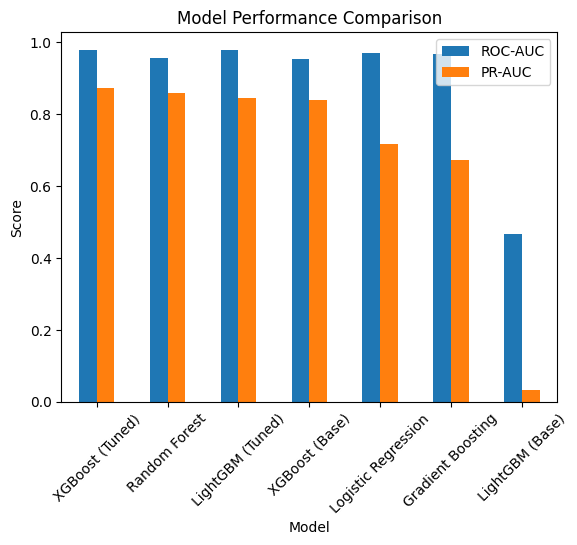

In [ ]:
import matplotlib.pyplot as plt

model_comparison.set_index("Model")[["ROC-AUC","PR-AUC"]].plot(kind="bar")

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

##8.3 Insight Model Comparison

a. Model linear seperti Logistic Regression (0.717454) memiliki performa lebih rendah karena fraud detection memiliki non-linear relationship antar fitur.

b. Model tree-based ensemble seperti:
* Random Forest
* XGBoost
* LightGBM

memiliki performa lebih baik karena mampu menangkap complex patterns pada transaksi fraud.

c. Hyperparameter tuning meningkatkan performa model :

```
XGBoost Base PR-AUC : 0.841
XGBoost Tuned PR-AUC : 0.874
```
Ini menunjukkan tuning berhasil meningkatkan kemampuan model dalam mendeteksi fraud.


##8.4 Final Model

Saya memutuskan memilih XGBoost Tuned

```
ROC-AUC : 0.978
PR-AUC : 0.874 (tertinggi)
```
Karena model paling baik membedakan fraud vs non fraud.


#**9. THRESHOLD OPTIMIZATION**

Bagian ini menjelaskan bahwa kita akan mencari threshold probabilitas terbaik untuk menentukan apakah transaksi termasuk fraud atau tidak.

##9.1 Apa itu Threshold?

> Model klasifikasi biasanya menghasilkan **probabilitas** bahwa suatu transaksi termasuk fraud.



Secara default, threshold yang digunakan adalah **0.5**, artinya:

- Jika probabilitas ≥ 0.5 → diklasifikasikan sebagai fraud
- Jika probabilitas < 0.5 → diklasifikasikan sebagai transaksi normal

Namun pada kasus **fraud detection**, threshold 0.5 belum tentu optimal karena:

- False Negative (fraud yang tidak terdeteksi) dapat menyebabkan kerugian besar
- False Positive (transaksi normal dianggap fraud) biasanya hanya menimbulkan gangguan kecil pada pengguna

Oleh karena itu, perlu dilakukan **threshold tuning** untuk menemukan nilai threshold yang paling optimal.

##9.2 List Threshold

- Pada tahap ini ditentukan beberapa nilai threshold yang akan digunakan untuk mengubah probabilitas hasil prediksi model menjadi kelas akhir (fraud atau non-fraud).
- Secara default, banyak model klasifikasi menggunakan threshold 0.5 untuk menentukan kelas. Namun pada kasus fraud detection, penggunaan threshold yang berbeda dapat membantu meningkatkan kemampuan model dalam mendeteksi transaksi fraud yang jumlahnya sangat sedikit dibandingkan transaksi normal.
- Oleh karena itu, beberapa nilai threshold diuji yaitu 0.5, 0.7, 0.8, 0.9, dan 0.95. Evaluasi dengan berbagai threshold ini bertujuan untuk melihat bagaimana perubahan threshold mempengaruhi performa model, khususnya dalam mendeteksi kelas fraud.

In [ ]:
thresholds = [0.5, 0.7, 0.8, 0.9, 0.95]

##9.3 Simpan Probabilitas Semua Model

- Pada tahap ini, probabilitas prediksi dari setiap model disimpan dalam sebuah dictionary. Nilai probabilitas ini merupakan hasil dari fungsi `predict_proba()` yang menunjukkan kemungkinan suatu transaksi termasuk ke dalam kelas fraud.
- Penyimpanan probabilitas dari setiap model bertujuan untuk memudahkan proses evaluasi pada berbagai threshold yang telah ditentukan sebelumnya. Dengan cara ini, setiap model dapat dibandingkan performanya secara konsisten tanpa perlu melakukan prediksi ulang.
- Model yang disimpan meliputi Logistic Regression, Random Forest, Gradient Boosting, XGBoost (baseline dan tuned), serta LightGBM (baseline dan tuned).

In [ ]:
models_prob = {
    "Logistic Regression": y_prob_lr,
    "Random Forest": y_prob_rf,
    "Gradient Boosting": y_prob_gb,
    "XGBoost Base": xgb_pred_proba_base,
    "XGBoost Tuned": xgb_pred_proba_tuned,
    "LightGBM Base": lgbm_pred_proba_base,
    "LightGBM Tuned": lgbm_pred_proba_tuned
}

##9.4 Evaluasi Semua Threshold

In [ ]:
results = []

for model_name, y_prob in models_prob.items():

    for threshold in thresholds:

        y_pred = (y_prob >= threshold).astype(int)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)

        results.append({
            "Model": model_name,
            "Threshold": threshold,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1
        })

results_df = pd.DataFrame(results)
results_df

,Model,Threshold,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.50,0.975492,0.060893,0.918367,0.114213
1,Logistic Regression,0.70,0.988554,0.121585,0.908163,0.214458
2,Logistic Regression,0.80,0.991802,0.161468,0.897959,0.273717
3,Logistic Regression,0.90,0.995137,0.246459,0.887755,0.385809
4,Logistic Regression,0.95,0.997437,0.391892,0.887755,0.543750
5,Random Forest,0.50,0.999526,0.961039,0.755102,0.845714
6,Random Forest,0.70,0.999386,0.970149,0.663265,0.787879
7,Random Forest,0.80,0.999263,0.966667,0.591837,0.734177
8,Random Forest,0.90,0.998982,0.954545,0.428571,0.591549
9,Random Forest,0.95,0.998806,0.968750,0.316327,0.476923


**Sort Berdasarkan F1**

Untuk mempermudah analisis, hasil evaluasi diurutkan berdasarkan nilai F1 Score dari yang tertinggi ke terendah.

> F1 Score digunakan karena memberikan keseimbangan antara Precision dan Recall, yang sangat penting dalam kasus fraud detection dengan dataset yang tidak seimbang.



In [ ]:
results_df.sort_values(by="F1 Score", ascending=False)

,Model,Threshold,Accuracy,Precision,Recall,F1 Score
21,XGBoost Tuned,0.70,0.999579,0.962500,0.785714,0.865169
20,XGBoost Tuned,0.50,0.999561,0.929412,0.806122,0.863388
22,XGBoost Tuned,0.80,0.999561,0.974026,0.765306,0.857143
16,XGBoost Base,0.70,0.999526,0.938272,0.775510,0.849162
18,XGBoost Base,0.90,0.999526,0.961039,0.755102,0.845714
5,Random Forest,0.50,0.999526,0.961039,0.755102,0.845714
17,XGBoost Base,0.80,0.999508,0.948718,0.755102,0.840909
15,XGBoost Base,0.50,0.999491,0.915663,0.775510,0.839779
34,LightGBM Tuned,0.95,0.999473,0.972222,0.714286,0.823529
33,LightGBM Tuned,0.90,0.999456,0.958904,0.714286,0.818713


##9.5 Threshold Terbaik

Berdasarkan evaluasi beberapa threshold pada model XGBoost Tuned, ditemukan bahwa threshold **0.7** memberikan performa terbaik dengan:

- Precision : 0.962
- Recall : 0.785
- F1 Score : 0.865

Threshold ini memberikan keseimbangan terbaik antara kemampuan model dalam mendeteksi fraud (recall) dan meminimalkan false positive (precision).

Threshold yang lebih tinggi seperti 0.9 atau 0.95 memang meningkatkan precision, namun recall menurun cukup signifikan sehingga banyak transaksi fraud tidak terdeteksi.

#**10. BUSINESS IMPACT ANALYSIS**

##10.1 Fraud Detection Result with Optimal Threshold

Pada tahap ini, model XGBoost Tuned digunakan dengan threshold optimal sebesar **0.7**.

Tujuan analisis ini adalah untuk melihat dampak model dalam mendeteksi transaksi fraud dan non-fraud berdasarkan data

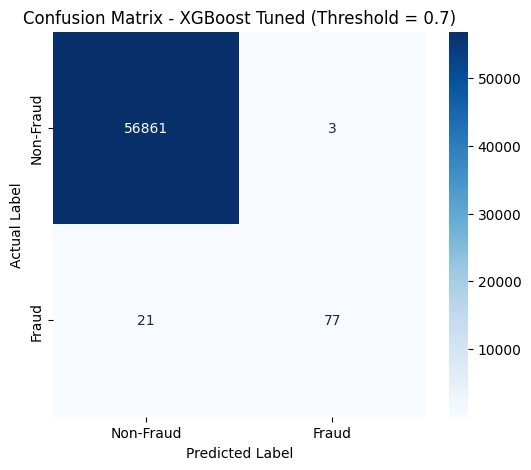

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

threshold = 0.7

y_pred_optimal = (xgb_pred_proba_tuned >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(6,5))

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Non-Fraud", "Fraud"],
    yticklabels=["Non-Fraud", "Fraud"]
)

plt.title("Confusion Matrix - XGBoost Tuned (Threshold = 0.7)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

plt.show()

**Insight :**
- Berdasarkan confusion matrix yang dihasilkan oleh model XGBoost Tuned dengan threshold 0.7, terlihat bahwa model mampu mengklasifikasikan sebagian besar transaksi non-fraud dengan sangat baik. Dari total transaksi non-fraud, sebanyak 56.861 transaksi berhasil diprediksi dengan benar sebagai non-fraud, sementara hanya 3 transaksi yang salah diklasifikasikan sebagai fraud (False Positive).
- Untuk transaksi fraud, model berhasil mendeteksi 77 transaksi fraud dengan benar (True Positive). Namun masih terdapat 21 transaksi fraud yang tidak terdeteksi dan diprediksi sebagai non-fraud (False Negative).
- Hasil ini menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam mengenali transaksi normal, dengan tingkat kesalahan yang sangat kecil pada kelas non-fraud. Namun demikian, masih terdapat sejumlah transaksi fraud yang tidak terdeteksi, yang menunjukkan adanya trade-off antara mengurangi false positive dan meningkatkan deteksi fraud.

**Fraud Detection vs Missed Fraud Visualization**

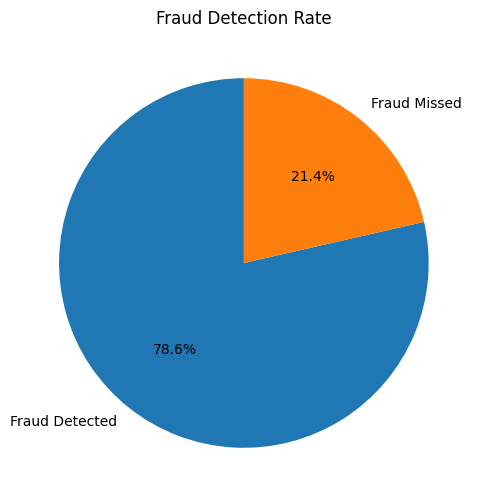

In [ ]:
labels = ["Fraud Detected", "Fraud Missed"]
sizes = [TP, FN]

plt.figure(figsize=(6,6))

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Fraud Detection Rate")

plt.show()

**Insight :**
- Dari seluruh transaksi fraud pada data uji, model berhasil mendeteksi sekitar 78.6% transaksi fraud, sementara sekitar 21.4% transaksi fraud tidak berhasil terdeteksi oleh model.
- Hal ini menunjukkan bahwa model memiliki kemampuan deteksi fraud yang cukup baik, karena mampu menangkap sebagian besar transaksi fraud yang terjadi. Namun demikian, masih terdapat sekitar seperlima transaksi fraud yang tidak teridentifikasi, sehingga pada implementasi nyata mungkin diperlukan penyesuaian threshold atau strategi tambahan untuk meningkatkan tingkat deteksi fraud tanpa meningkatkan terlalu banyak false positive.

##10.2 Interpretasi Confusion Matrix

Hasil confusion matrix menunjukkan performa model XGBoost Tuned pada threshold 0.7.

- **True Negative (TN)** : 56,861 transaksi normal berhasil diprediksi dengan benar.
- **False Positive (FP)** : 3 transaksi normal salah diprediksi sebagai fraud.
- **False Negative (FN)** : 21 transaksi fraud tidak berhasil terdeteksi.
- **True Positive (TP)** : 77 transaksi fraud berhasil dideteksi oleh model.

Hasil ini menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam mengidentifikasi transaksi normal, dengan jumlah false positive yang sangat kecil.

##10.3 Hitung Fraud Detection Rate

In [ ]:
TN, FP, FN, TP = cm.ravel()

fraud_detection_rate = TP / (TP + FN)

print("Fraud Detection Rate:", fraud_detection_rate)

Fraud Detection Rate: 0.7857142857142857


##10.4 Fraud Detection Rate

Fraud Detection Rate digunakan untuk mengukur seberapa banyak transaksi fraud yang berhasil dideteksi oleh model.

Rumus yang digunakan :

Fraud Detection Rate = TP / (TP + FN)

Dimana :
- TP (True Positive) : transaksi fraud yang berhasil dideteksi
- FN (False Negative) : transaksi fraud yang tidak berhasil terdeteksi


Berdasarkan hasil confusion matrix :

TP = 77  
FN = 21  

Maka :

Fraud Detection Rate = 77 / (77 + 21) = **0.7857**

Artinya model mampu mendeteksi sekitar **78.57% transaksi fraud** pada data pengujian.

Hal ini menunjukkan bahwa model memiliki kemampuan yang cukup baik dalam mendeteksi aktivitas fraud, meskipun masih terdapat sebagian kecil transaksi fraud yang belum terdeteksi.

#**11. FINAL MODEL AND BUSINESS RECOMMENDATION**

Berdasarkan hasil eksperimen dan evaluasi model, dilakukan perbandingan beberapa algoritma machine learning untuk mendeteksi transaksi fraud pada kartu kredit, yaitu Logistic Regression, Random Forest, Gradient Boosting, XGBoost, dan LightGBM.

Hasil evaluasi menunjukkan bahwa **XGBoost Tuned** memberikan performa terbaik dengan nilai:

- ROC-AUC : 0.978
- PR-AUC : 0.874

Karena dataset bersifat **imbalanced**, metrik PR-AUC menjadi indikator yang lebih relevan dalam mengevaluasi kemampuan model mendeteksi fraud.

Selanjutnya dilakukan **threshold optimization** untuk menemukan nilai threshold yang paling optimal dalam menyeimbangkan precision dan recall. Berdasarkan evaluasi, threshold **0.7** dipilih sebagai threshold terbaik.

Dengan threshold tersebut, model menghasilkan:

- Fraud Detected : 77 transaksi
- Missed Fraud : 21 transaksi
- False Alarm : 3 transaksi

Model mampu mendeteksi sekitar **78.6% transaksi fraud**, dengan jumlah false alarm yang sangat rendah.

Secara keseluruhan, hasil ini menunjukkan bahwa model memiliki kemampuan yang baik dalam membantu sistem perbankan atau fintech untuk mendeteksi transaksi fraud secara lebih efektif dan meminimalkan potensi kerugian finansial.